In [ ]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston


In [ ]:
boston=load_boston()
df=pd.DataFrame(data=boston.data,columns=boston.feature_names)

In [ ]:
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
df["expensive"]=boston['target']
df['expensive1']=df['expensive'].apply(lambda x: "yes" if x>30 else "no") # define expensive based on the price stored on expensive column
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,expensive,expensive1
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,no
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,no
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,yes
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,yes
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,yes


In [ ]:
print('Proportion of YES: {:.3f}%, Proportion of NO: {:.3f}%'.format(df[df['expensive1']=='yes']['expensive1'].count()*100/df.shape[0], df[df['expensive1']=='no']['expensive1'].count()*100/df.shape[0]))
df['expensive1'].describe()

Proportion of YES: 16.601%, Proportion of NO: 83.399%


count     506
unique      2
top        no
freq      422
Name: expensive1, dtype: object

In [ ]:
df["expensive1"].count()

506

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter("ignore") # for GridSearchCV: some of its combination throws warning which is fine (they are not appropriate combination)

In [ ]:
df=df.drop(columns=["expensive"])


In [ ]:
df.head()
y=df['expensive1'].apply(lambda x: 0 if x=="no" else 1) # Define y


In [ ]:
y.head(30)

0     0
1     0
2     1
3     1
4     1
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
Name: expensive1, dtype: int64

In [ ]:
X=df.drop(["expensive1"],axis=1) #Define x
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
sc=StandardScaler()
X=sc.fit_transform(X) #define and fit standard scaler



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(X_test.shape)


(404, 13)
(102, 13)
(404,)
(102, 13)


In [ ]:
param_grid=[{"C":np.logspace(-4,4,15)},
            {"penalty": ["l1","l2"]},
            {"solver": ["lbfgs","liblinear","adam"]},
            {"max_iter":[10000]}]
lr=LogisticRegression()



In [ ]:
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv=10, scoring='recall', refit=True) # you can change scoring function that will impact the estimator #### https://scikit-learn.org/stable/modules/model_evaluation.html
grid = grid.fit(X_train, y_train)
print('Best_estimator_: {}\nWeights: {}, Intercept: {}\nBest params: {}\nScorer: {}'.format(grid.best_estimator_, grid.best_estimator_.coef_, grid.best_estimator_.intercept_,grid.best_params_, grid.scorer_))
print('Available parameters for the estimator (fine-tuning): ',lr.get_params().keys())

Best_estimator_: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Weights: [[ 0.14513444  0.39202927 -0.97854289  0.1618424   0.02479979  1.47605734
   0.35606539 -0.67879687  0.95373518 -0.49196683 -0.73602807  0.1204218
  -2.43396895]], Intercept: [-4.37431992]
Best params: {'C': 1.0}
Scorer: make_scorer(recall_score, average=binary)
Available parameters for the estimator (fine-tuning):  dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


In [ ]:
# model evaluation for training set
y_train_predict = grid.predict(X_train)
print("Training SET")
print("--------------------------------------")
print('Accuracy: {:.3f}, Precision: {:.3f}, Recall: {:.3f}, F1 Score: {:.3f}'.format(accuracy_score(y_train, y_train_predict), precision_score(y_train, y_train_predict), recall_score(y_train, y_train_predict), f1_score(y_train, y_train_predict)))
print("Confusion Matrix:\n {}".format(confusion_matrix(y_train, y_train_predict)))

# model evaluation for testing set
y_test_predict = grid.predict(X_test)

print("\nTesting SET")
print("--------------------------------------")
print('Accuracy: {:.3f}, Precision: {:.3f}, Recall: {:.3f}, F1 Score: {:.3f}'.format(accuracy_score(y_test, y_test_predict), precision_score(y_test, y_test_predict), recall_score(y_test, y_test_predict), f1_score(y_test, y_test_predict)))
print("Confusion Matrix:\n {}".format(confusion_matrix(y_test, y_test_predict)))

Training SET
--------------------------------------
Accuracy: 0.953, Precision: 0.853, Recall: 0.866, F1 Score: 0.859
Confusion Matrix:
 [[327  10]
 [  9  58]]

Testing SET
--------------------------------------
Accuracy: 0.961, Precision: 0.882, Recall: 0.882, F1 Score: 0.882
Confusion Matrix:
 [[83  2]
 [ 2 15]]


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score 



In [ ]:
#predict probabilities' 

lr_probs_train=grid.predict_proba(X_train)
lr_probs_test=grid.predict_proba(X_test)

#keep probabilities for the positive outcome only 
lr_probs_train=lr_probs_train[:,1]
lr_probs_test=lr_probs_test[:,1]
print('ROC AUC (Training)={:.3f}'.format(roc_auc_score(y_train, lr_probs_train)))
print('ROC AUC (Testing)={:.3f}'.format(roc_auc_score(y_test, lr_probs_test)))

ROC AUC (Training)=0.981
ROC AUC (Testing)=0.982


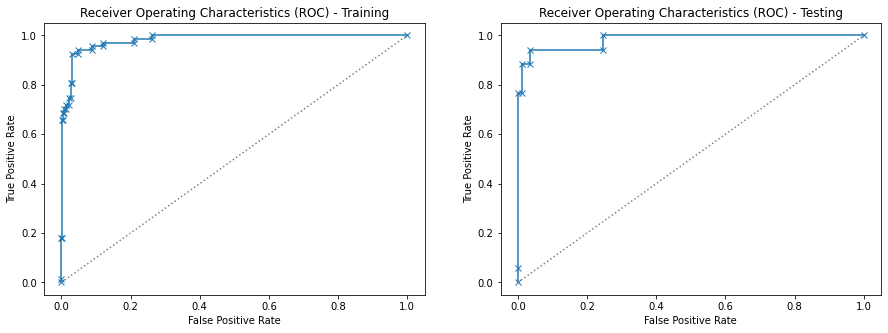

In [ ]:
lr_fpr_train, lr_tpr_train,_ = roc_curve(y_train, lr_probs_train)
lr_fpr_test, lr_tpr_test,_ = roc_curve(y_test, lr_probs_test)

# plot the roc curve for the training set
_ = plt.figure(figsize=(15, 5))
ax1 =plt.subplot(121)
_ = ax1.plot(lr_fpr_train, lr_tpr_train, marker='x')
_ = ax1.plot([0,1], [0, 1], 'gray', linestyle=':', marker='')
_ = ax1.set_title('Receiver Operating Characteristics (ROC) - Training')
_ = ax1.set_xlabel('False Positive Rate')
_ = ax1.set_ylabel('True Positive Rate')

# plot the roc curve for the testing set
ax2 = plt.subplot(122)
_ = ax2.plot(lr_fpr_test, lr_tpr_test, marker='x')
_ = ax2.plot([0,1], [0, 1], 'gray', linestyle=':', marker='')
_ = ax2.set_title('Receiver Operating Characteristics (ROC) - Testing')
_ = ax2.set_xlabel('False Positive Rate')
_ = ax2.set_ylabel('True Positive Rate')

In [ ]:
expensive = {1: 'yes', 0:'no'} # just to revert back y_test's 0,1 numeric to YES/NO categorical values for display
pb_df = pd.DataFrame({'expensive1':[expensive[numeric_cat] for numeric_cat in y_test[0:]], 'PREDICTED PROBABILITY OF BEING EXPENSIVE':lr_probs_test[0:]}, columns=['expensive1', 'PREDICTED PROBABILITY OF BEING EXPENSIVE'])
pb_df.iloc[10:20].head(10)

,expensive1,PREDICTED PROBABILITY OF BEING EXPENSIVE
10,yes,0.542816
11,no,0.173117
12,no,0.003434
13,no,0.000922
14,no,0.000968
15,no,0.254443
16,yes,0.802174
17,no,0.000014
18,no,0.000225
19,no,0.011674


In [ ]:
boston['target'][10:20]

array([15. , 18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2])

In [ ]:
# compute: net input (z): refer to Slide 4 of lecture notes [it is just the weighted sum, z = \sum_{j=1}^m w_j.x_j + w_0]
z = np.dot(X_test[10:11].tolist()[0], grid.best_estimator_.coef_[0])+grid.best_estimator_.intercept_[0]

# compute: sigma(z): the probability / activation function output - again refer to Slide 4 of lecture notes....
sigma_z = 1 / (1+ np.exp(-z))
print("For record X_test[10], our manually computed probability: {}, sklearn's returned probability: {}".format(sigma_z, grid.predict_proba(X_test[10:11])[:,1][0]))
print('The two false positives are below: ')
pb_df[(pb_df['expensive1'] == 'no') & (pb_df['PREDICTED PROBABILITY OF BEING EXPENSIVE'] >= 0.5)]

For record X_test[10], our manually computed probability: 0.5428158532370688, sklearn's returned probability: 0.5428158532370688
The two false positives are below: 


,expensive1,PREDICTED PROBABILITY OF BEING EXPENSIVE
